In [11]:
%pylab inline
import numpy as np
import pyEXP
import EXP_tools 
import nba
import matplotlib.pyplot as plt
plt.style.use('~/matplotlib.mplstyle')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
halo = nba.ios.load_halo('/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110', N_halo_part=[100000000, 15000000],
                          com_frame=0,
                          galaxy=0, snapformat=3, q=['pos', 'vel', 'mass'], com_method='diskpot')

* Loading snapshot: /mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110 
* Loading 'ParticleIDs' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
Returning IDs for galaxy=0
100000000
* Loading 'Coordinates' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Velocities' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Masses' of particles types 'PartType1' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading halo 0 particle data
* Computing coordinates in halo 0 reference frame
* Loading 'Coordinates' of particles types 'PartType2' from snapshot: '/mnt/home/nico/gadget_runs/isolated_MW/MWLMC5_100M_b0_vir_OM3_G4_110.hdf5'
* Loading 'Velocities' of particles types 'PartType2' from snapshot:

In [3]:
pos = halo['pos']
mass = halo['mass']


In [4]:
sample = np.random.randint(0, len(mass), 100000)
pos_sample = pos[sample]
mass_sample = mass[sample]

(-200.0, 200.0)

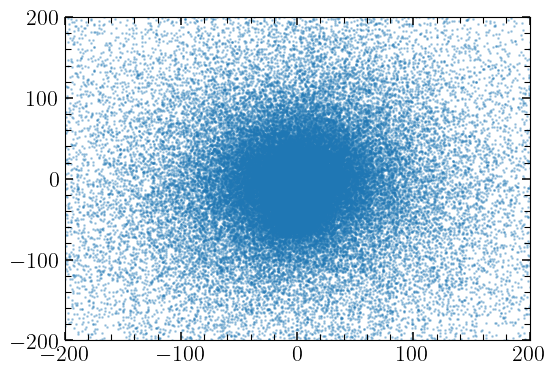

In [12]:
plt.scatter(pos_sample[:,0], pos_sample[:,1], s=1, alpha=0.3)
plt.xlim(-200, 200)
plt.ylim(-200, 200)

In [13]:
basis, coefs = EXP_tools.basis_utils.make_a_BFE(pos_sample, mass_sample, basis_id='sphereSL', time=2.2, numr=500, rmin=0.01, rmax=400, 
                                                lmax=5, nmax=10, scale=40.5, modelname='SLGrid.empirial_halo.isolate.mwlmc5_test', 
                                                cachename=".slgrid_sph_mwmlmc5_hern_empirical", add_coef=False, coef_file='mwlmc5_hern_empirical_coef.h5', 
                                                empirical=True)

No config file provided.
Computing empirical density
------------------------------------------------------------
Cache parameters for SLGridSph: .slgrid_sph_mwmlmc5_hern_empirical
------------------------------------------------------------
model               : SLGrid.empirial_halo.isolate.mwlmc5_test
lmax                : 5
nmax                : 10
numr                : 500
cmap                : 1
rmin                : 0.59999999999999998
rmax                : 599.39999999999998
scale               : 40.5
diverge             : 0
dfac                : 1
------------------------------------------------------------


---- SLGridSph::ReadH5Cache: read basis cache <.slgrid_sph_mwmlmc5_hern_empirical.h5>
HDF5-DIAG: Error detected in HDF5 (1.10.8) thread 0:
  #000: /dev/shm/nix-build-hdf5-1.10.8.drv-0/nixbld4/spack-stage-hdf5-1.10.8-4llfcdl4yg928lkan2xaxn0m9g0h5sfk/spack-src/src/H5A.c line 271 in H5Acreate2(): unable to create attribute
    major: Attribute
    minor: Unable to initialize object
  #001: /dev/shm/nix-build-hdf5-1.10.8.drv-0/nixbld4/spack-stage-hdf5-1.10.8-4llfcdl4yg928lkan2xaxn0m9g0h5sfk/spack-src/src/H5Aint.c line 156 in H5A__create(): attribute already exists
    major: Attribute
    minor: Object already exists
Unable to create the attribute "geometry": (Attribute) Object already exists


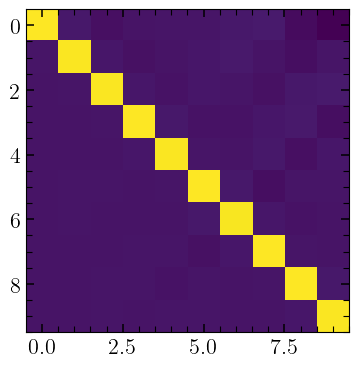

In [14]:
# Check that the basis is orthogonal
plt.imshow(basis.orthoCheck()[0])

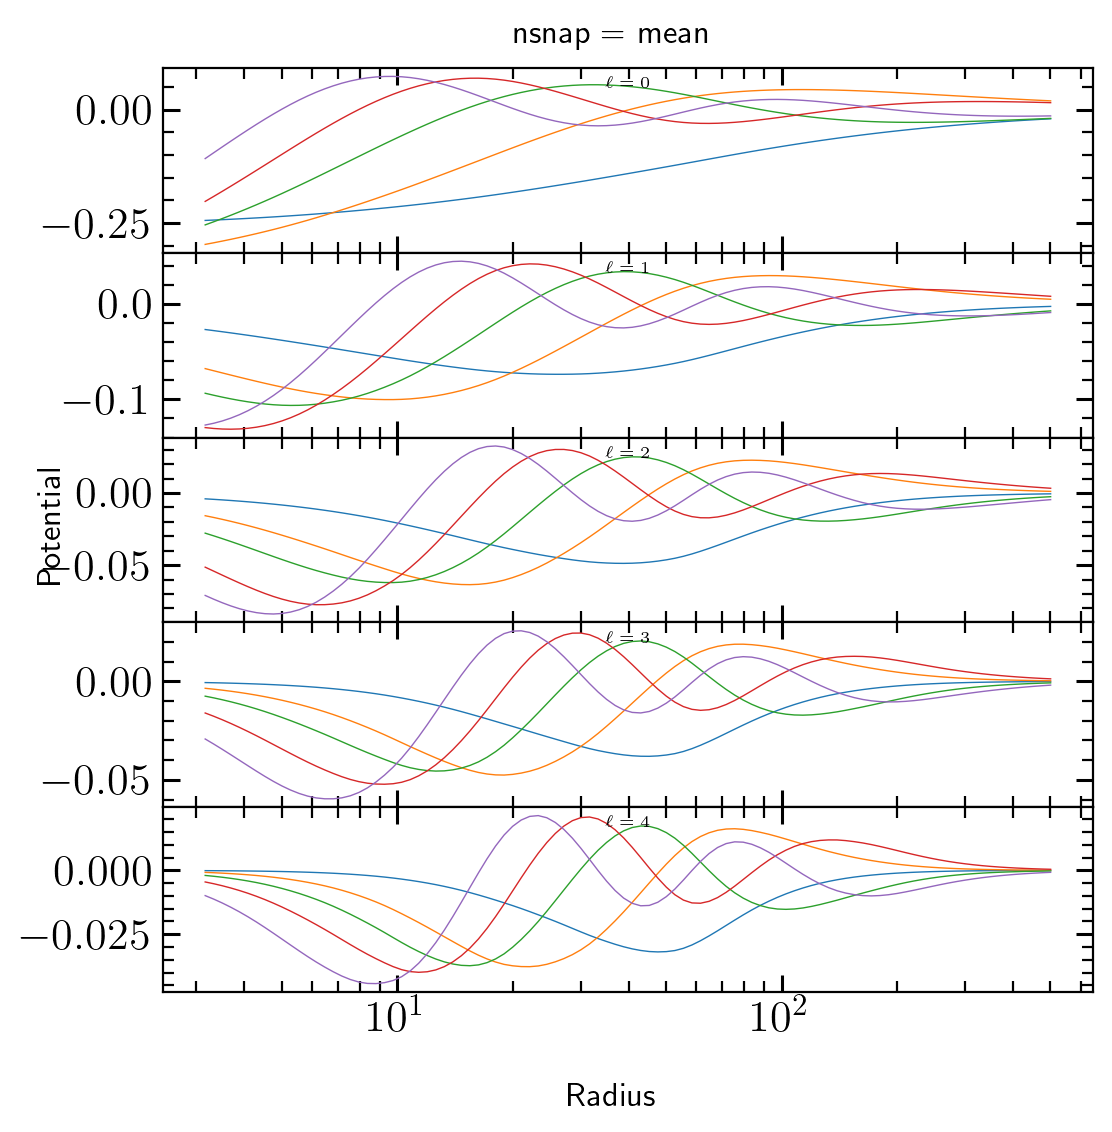

In [15]:
EXP_tools.visualize.make_basis_plot(basis, 5, 5)